In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 2000

# Paths

In [66]:
dataset = 'Data/mano_keypoint.csv'
modelo_path = 'Modelos/Sign_classifier_V2.1.keras'
tflite_path = 'Modelos/Sign_classifier_V2.1.tflite'

In [67]:
dataset

'Data/mano_keypoint.csv'

# Clases

Del -> '.'
Space -> ' '

In [68]:
CLASES=[' ','.','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u', 'v', 'w', 'x', 'y', 'z']
NUM_CLASES = len(CLASES)

# Leer el dataset

In [69]:
#Cargar los datos desde la segunda columna hasta la última
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [70]:
#Cargar los datos de la primera columna
y_dataset = np.loadtxt(dataset, delimiter=',', dtype=str, usecols=(0))
# Obtener las clases y sus conteos
valores_unicos, conteos = np.unique(y_dataset, return_counts=True)
pd.DataFrame({'Clase': valores_unicos, 'Conteo': conteos})

,Clase,Conteo
0,,374
1,.,311
2,a,300
3,b,300
4,c,300
5,d,300
6,e,300
7,f,300
8,g,300
9,h,300


In [71]:
#Codificar las clases
y_dataset = np.array([CLASES.index(y) for y in y_dataset])

In [72]:
#Dividir el conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.7, random_state=RANDOM_SEED)

# Configuracion del modelo

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )), #21 caracteristicas por cada entrada 2 dimensiones
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                2752      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 30)                1950      
                                                                 
 dense_11 (Dense)            (None, 28)                868       
                                                                 
Total params: 5,570
Trainable params: 5,570
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Guardar checkpoints durante el entrenamiento
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    modelo_path, verbose=1, save_weights_only=False)
# Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=40, verbose=1)

In [76]:
# Generacion del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento

In [77]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
36/47 [=====================>........] - ETA: 0s - loss: 3.3142 - accuracy: 0.0562
Epoch 1: saving model to Modelos\Sign_classifier_V2.1.keras
47/47 [==============================] - 1s 7ms/step - loss: 3.2972 - accuracy: 0.0621 - val_loss: 3.1917 - val_accuracy: 0.1481
Epoch 2/1000
32/47 [===================>..........] - ETA: 0s - loss: 3.1538 - accuracy: 0.1245
Epoch 2: saving model to Modelos\Sign_classifier_V2.1.keras
47/47 [==============================] - 0s 3ms/step - loss: 3.1019 - accuracy: 0.1396 - val_loss: 2.8666 - val_accuracy: 0.2423
Epoch 3/1000
34/47 [====================>.........] - ETA: 0s - loss: 2.7671 - accuracy: 0.2057
Epoch 3: saving model to Modelos\Sign_classifier_V2.1.keras
47/47 [==============================] - 0s 3ms/step - loss: 2.7171 - accuracy: 0.2130 - val_loss: 2.3229 - val_accuracy: 0.4222
Epoch 4/1000
33/47 [====================>.........] - ETA: 0s - loss: 2.3228 - accuracy: 0.3094
Epoch 4: saving model to Modelos\Sign_classifier_

In [78]:
# Evaluación del modelo
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9827


In [79]:
# Carga del modelo
model = tf.keras.models.load_model(modelo_path)

In [80]:
# Clasificacion
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))


1/1 [==============================] - 0s 33ms/step
[1.4073945e-06 1.0325206e-04 5.4998795e-04 8.8561831e-11 6.9290400e-07
 1.3189417e-07 3.5607758e-05 2.6710724e-05 3.7818969e-13 1.2878423e-10
 8.6954941e-08 1.2428247e-04 5.3434417e-20 2.6621746e-14 3.8433150e-09
 5.5339754e-23 1.2159667e-05 2.2064413e-16 5.2646062e-08 4.6780489e-29
 1.7524579e-08 2.6189103e-12 6.8290290e-26 1.7025473e-18 8.8011297e-16
 5.1006319e-21 9.9914551e-01 2.5877500e-10]
26


# Matriz de confusion y métricas de rendimiento

80/80 [==============================] - 0s 869us/step


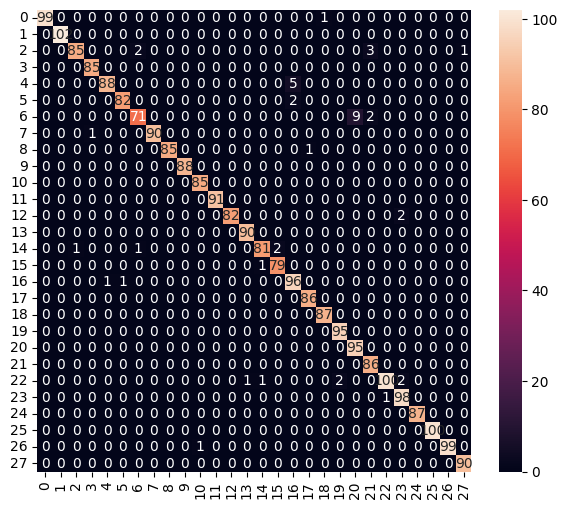

Metricas de rendimiento
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       1.00      1.00      1.00       102
           2       0.99      0.93      0.96        91
           3       0.99      1.00      0.99        85
           4       0.99      0.95      0.97        93
           5       0.99      0.98      0.98        84
           6       0.96      0.87      0.91        82
           7       1.00      0.99      0.99        91
           8       1.00      0.99      0.99        86
           9       1.00      1.00      1.00        88
          10       0.99      1.00      0.99        85
          11       1.00      1.00      1.00        91
          12       1.00      0.98      0.99        84
          13       0.99      1.00      0.99        90
          14       0.98      0.95      0.96        85
          15       0.98      0.99      0.98        80
          16       0.93      0.98      0.96        98
   

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
#Generacion de matriz de confusion y reporte de clasificacion
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Metricas de rendimiento')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convertir el modelo a Tensorflow-Lite

In [82]:
# Guardar el modelo en formato keras
model.save(modelo_path)

In [83]:

# Crear un convertidor TFLite a partir del modelo de Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Configurar el convertidor para aplicar optimizaciones de cuantización
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Generar el modelo cuantizado
tflite_quantized_model = converter.convert()

# Guardar el modelo cuantizado en un archivo
open(tflite_path, 'wb').write(tflite_quantized_model)
#open('Modelos/Clasificador_gestos99.tflite', 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\juanj\AppData\Local\Temp\tmpwfu1_f4u\assets


INFO:tensorflow:Assets written to: C:\Users\juanj\AppData\Local\Temp\tmpwfu1_f4u\assets


10720

# Prueba de modelo

In [84]:
# Crear un intérprete de TensorFlow Lite a partir de un modelo TFLite
interpreter = tf.lite.Interpreter(model_path=tflite_path)

# Asignar tensores al intérprete
interpreter.allocate_tensors()

In [85]:
# Obtener los detalles de entrada y salida del intérprete
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [86]:
# Establecer el tensor de entrada del intérprete de TensorFlow Lite con el primer elemento de X_test
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [87]:
%%time
# Detalles del uso del modelo

# Invocar el intérprete para realizar la inferencia
interpreter.invoke()
# Obtener los resultados de la inferencia del tensor de salida
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [88]:
# Imprimir los resultados de la inferencia del modelo TFLite
print(np.squeeze(tflite_results))

# Imprimir el índice del valor máximo en los resultados, que corresponde a la clase predicha
print(np.argmax(np.squeeze(tflite_results)))

[1.2806190e-06 1.2131573e-04 5.1585230e-04 6.3566062e-11 6.8042743e-07
 1.4230115e-07 3.9293423e-05 3.0405823e-05 3.2750322e-13 1.2388175e-10
 9.2001393e-08 1.2934674e-04 2.3801683e-20 1.6291310e-14 3.4387571e-09
 3.3896264e-23 1.4050268e-05 1.7659696e-16 6.8571786e-08 2.1242443e-29
 2.0669924e-08 1.8931100e-12 2.2319661e-26 9.2160163e-19 6.5925850e-16
 3.2330009e-21 9.9914742e-01 1.7442761e-10]
26
